In [1]:
import chess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
from sklearn.linear_model import LinearRegression

from p4_generate_dataset import SAMPLE_ELOS

C:\Users\Philipp\Documents\Code\chess\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Saved enriched dataset to 'data/stats_dataset.parquet'


In [2]:
df = pd.read_parquet("../data/stats_dataset.parquet")
df.head()

,fen,next_move,avg_elo,global_winrate,count,engine_move,fragility_score,delta,variance,score_base,...,recommended_move_2200,is_best_2200,is_engine_best_2200,frag_rec_2200,is_frag_best_2200,delta_rec_2200,is_delta_best_2200,mix_score_2200,mix_rec_2200,is_mix_best_2200
0,2kr1bnr/ppp1pppp/2n5/3q4/6b1/5N2/PPPPBPPP/RNBQ...,b1c3,1837.177419,0.451613,62,h2h3,0.969970,0.445946,0.568318,0.661411,...,b1c3,True,False,b1c3,True,b1c3,True,0.445946,b1c3,True
1,2kr1bnr/pppbpppp/2n1q3/8/8/2N2N2/PPPPBPPP/R1BQ...,f1e1,1400.066667,0.550000,60,d2d4,0.989990,0.042606,0.877878,0.636825,...,f1e1,True,False,f1e1,True,f1e1,True,0.042606,f1e1,True
2,r1b1kb1r/ppp1pppp/2n1qn2/8/8/2N2N2/PPPPBPPP/R1...,d2d4,1296.660714,0.625000,112,d2d4,1.000000,0.462963,0.869137,0.777367,...,d2d4,True,True,e1g1,False,d2d4,True,0.462963,d2d4,True
3,r1b1kb1r/ppp1pppp/2n1qn2/8/8/2N2N2/PPPPBPPP/R1...,e1g1,1317.025455,0.603636,275,d2d4,1.000000,0.110110,0.867868,0.659326,...,d2d4,True,True,e1g1,False,d2d4,True,0.110110,d2d4,True
4,r1b1kb1r/ppp1pppp/2n2n2/3q4/8/5N2/PPPPBPPP/RNB...,e1g1,1626.631579,0.438596,57,d2d4,0.996724,0.909409,0.927942,0.944692,...,e1g1,True,False,e1g1,True,e1g1,True,0.909409,e1g1,True


In [3]:
df.describe()

,avg_elo,global_winrate,count,fragility_score,delta,variance,score_base,winrate_500,score_500,mix_score_500,...,mix_score_850,winrate_1200,score_1200,mix_score_1200,winrate_1500,score_1500,mix_score_1500,winrate_2200,score_2200,mix_score_2200
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,1532.871038,0.476793,531.174897,0.735301,0.504904,0.498211,0.579472,0.132313,0.579472,0.620102,...,0.620102,0.471575,0.579472,0.597063,0.480479,0.579472,0.562503,0.402570,0.579472,0.504904
std,188.159047,0.081600,2980.339144,0.253262,0.349569,0.348899,0.173293,0.301689,0.173293,0.232520,...,0.232520,0.153756,0.173293,0.247862,0.105495,0.173293,0.279921,0.312500,0.173293,0.349569
min,1128.297297,0.040000,50.000000,0.000000,0.000000,0.000000,0.066239,0.000000,0.066239,0.040446,...,0.040446,0.000000,0.066239,0.033120,0.000000,0.066239,0.022131,0.000000,0.066239,0.000000
25%,1377.616828,0.430551,65.000000,0.614615,0.110110,0.169214,0.481583,0.000000,0.481583,0.481655,...,0.481655,0.388889,0.481583,0.411086,0.421053,0.481583,0.292270,0.000000,0.481583,0.110110
50%,1530.909284,0.479279,105.000000,0.763421,0.451451,0.566209,0.592109,0.000000,0.592109,0.627878,...,0.627878,0.473684,0.592109,0.603036,0.480000,0.592109,0.534472,0.428571,0.592109,0.451451
75%,1692.551379,0.519960,208.250000,0.942943,0.902402,0.868257,0.676703,0.000000,0.676703,0.797548,...,0.797548,0.545982,0.676703,0.818869,0.533381,0.676703,0.850282,0.569876,0.676703,0.902402
max,1963.800000,0.941176,35816.000000,1.000000,1.000000,1.000000,0.972944,1.000000,0.972944,0.996253,...,0.996253,1.000000,0.972944,0.995904,1.000000,0.972944,0.995380,1.000000,0.972944,1.000000


In [4]:
results = []

for elo in SAMPLE_ELOS:
    is_best_col = f"is_best_{elo}"
    is_engine_col = f"is_engine_best_{elo}"
    is_frag_col = f"is_frag_best_{elo}"
    is_delta_col = f"is_delta_best_{elo}"
    is_mix_col = f"is_mix_best_{elo}"

    avg_is_best = (df[is_best_col] * df["count"]).sum() / df["count"].sum()
    avg_is_engine_best = (df[is_engine_col] * df["count"]).sum() / df["count"].sum()
    avg_is_frag_best = (df[is_frag_col] * df["count"]).sum() / df["count"].sum()
    avg_is_delta_best = (df[is_delta_col] * df["count"]).sum() / df["count"].sum()
    avg_is_mix_best = (df[is_mix_col] * df["count"]).sum() / df["count"].sum()

    results.append({
        "elo": elo,
        "avg_is_best": avg_is_best,
        "avg_is_engine_best": avg_is_engine_best,
        "avg_is_frag_best": avg_is_frag_best,
        "avg_is_delta_best": avg_is_delta_best,
        "avg_is_mix_best": avg_is_mix_best,
    })

pd.DataFrame(results)

,elo,avg_is_best,avg_is_engine_best,avg_is_frag_best,avg_is_delta_best,avg_is_mix_best
0,500,0.527652,0.271225,0.694869,0.576721,0.576721
1,850,0.581539,0.303679,0.576012,0.595880,0.595880
2,1200,0.559339,0.275447,0.556562,0.584813,0.584813
3,1500,0.607300,0.298407,0.556031,0.621381,0.621381
4,2200,0.533017,0.223249,0.568931,0.535171,0.535171


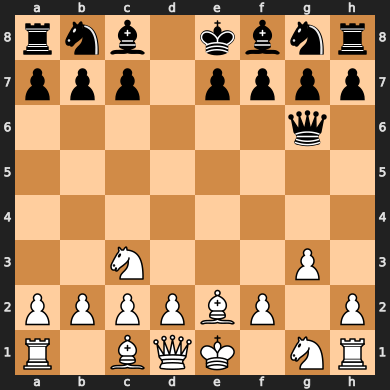

In [5]:
random_fen = df["fen"].sample(1).iloc[0]
filtered = df[df["fen"] == random_fen]
chess.Board(random_fen)

In [6]:
filtered

,fen,next_move,avg_elo,global_winrate,count,engine_move,fragility_score,delta,variance,score_base,...,recommended_move_2200,is_best_2200,is_engine_best_2200,frag_rec_2200,is_frag_best_2200,delta_rec_2200,is_delta_best_2200,mix_score_2200,mix_rec_2200,is_mix_best_2200
267,rnb1kbnr/ppp1pppp/6q1/8/8/2N3P1/PPPPBP1P/R1BQK...,b8c6,1453.836364,0.509091,55,c8f5,0.846847,0.019419,0.931932,0.599399,...,c8f5,False,False,b8c6,True,c8f5,False,0.019419,c8f5,False
268,rnb1kbnr/ppp1pppp/6q1/8/8/2N3P1/PPPPBP1P/R1BQK...,c8f5,1273.892857,0.482143,56,c8f5,0.846847,0.451451,0.894717,0.731005,...,c8f5,False,False,b8c6,True,c8f5,False,0.451451,c8f5,False


# Regression Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fen                    486 non-null    object 
 1   next_move              486 non-null    object 
 2   avg_elo                486 non-null    float64
 3   global_winrate         486 non-null    float64
 4   count                  486 non-null    int64  
 5   engine_move            486 non-null    object 
 6   fragility_score        486 non-null    float64
 7   delta                  486 non-null    float64
 8   variance               486 non-null    float64
 9   score_base             486 non-null    float64
 10  winrate_500            486 non-null    float64
 11  historical_best_500    486 non-null    object 
 12  score_500              486 non-null    float64
 13  recommended_move_500   486 non-null    object 
 14  is_best_500            486 non-null    bool   
 15  is_eng

In [8]:
# df["f_cross_d"] = df["fragility_score"] * df["delta"]
# df["f_cross_v"] = df["fragility_score"] * df["variance"]
# df["d_cross_v"] = df["delta"] * df["variance"]

selected_features = ["fragility_score", "delta", "variance", "score_base"] #"f_cross_d", "f_cross_v", "d_cross_v", ]
X = df[selected_features]
y = df["is_best_1500"]

In [9]:
model = LinearRegression()
model.fit(X, y)

for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")

fragility_score: -0.010
delta: 0.269
variance: 0.057
score_base: 0.105


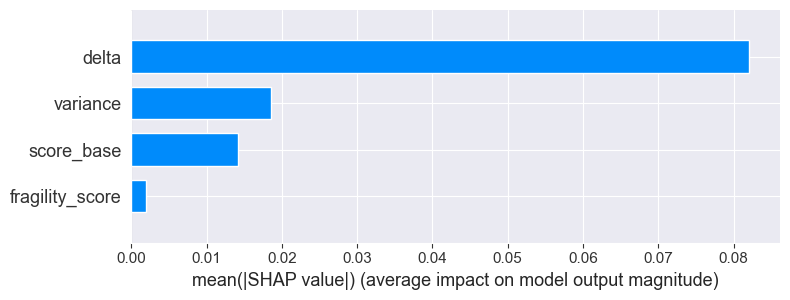

In [10]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X, plot_type="bar")

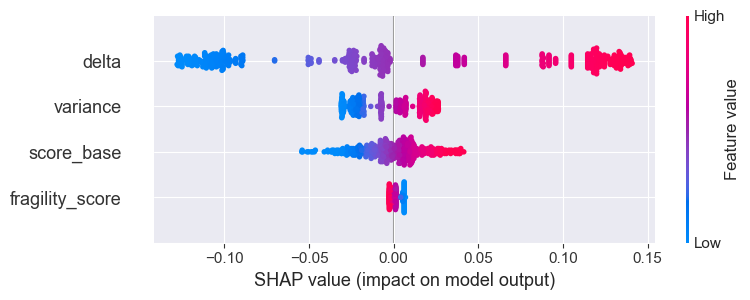

In [11]:
shap.summary_plot(shap_values, X, show=True)

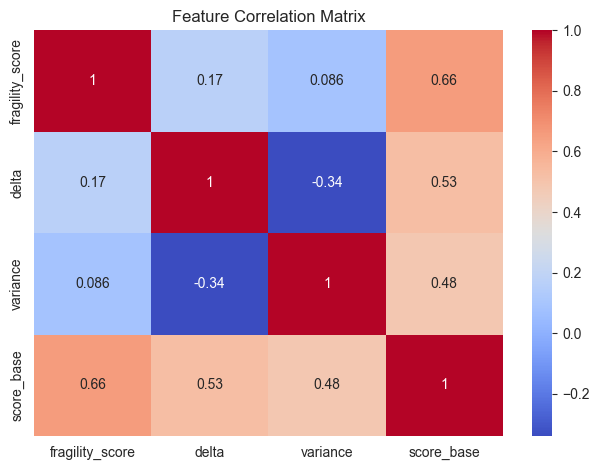

In [12]:
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()